# Automotive Example: Optimal Van Dimensions

<img alt="logo" width="512" height="139" src="img/Loughborough-Univeristy-Lboro-Logo-1024x258.png">

This notebook shows how the dimensions of a vehicle can be optimised for minimal drag.

Written by Thomas Steffen for teaching purposes.

This is an open educational resource available on github at https://www.github.com/tsteffenlboro . 

The code should be simple and mostly self explanatory. It follows the principle to always check every line, every function, and to demonstrate that it achieved success. 

# Revision History

| Aspect | Value |
| ------ | ------ |
| Owner | Thomas Steffen |
| Location | github |
| Confidentiality | Public |

| Date | Update |
| ---- | ------ |
| 2026-01-11 | creation |
| 2026-01-12 | github |
| 2026-01-13 | JupyterLite |
| 2026-01-14 | jupyterlab-slideshow |
| 2026-01-21 | optimisation complete |

# Overview



1. Set-up Python
2. Define the Cost Function
3. Plot the Cost Function
4. Use Derivatives
5. Solve Optimisation
6. Review the Results
7. Complete an Exercise
8. Introduce Homework
9. Conclude the Session

## Set-up Python

This code sets up our Python environment.

In [1]:
# Basic Setup
%pip install -q ipywidgets ipycanvas
import ipywidgets
import ipycanvas
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import scipy.optimize as sciopt

p = sym.Symbol("p")
p

Note: you may need to restart the kernel to use updated packages.


p

## Define the Cost Function

Assume that the van is a box, with length $x$, width $y$, and height $z$. 

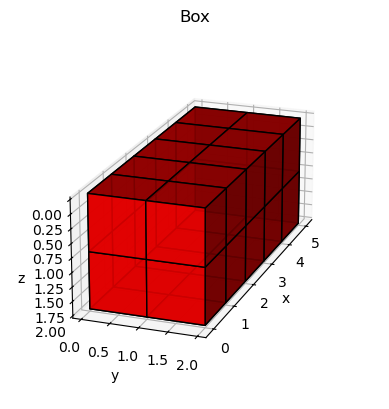

In [2]:
data = np.ones([5,2,2], dtype=np.bool)
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_xlabel("x");ax.set_ylabel("y");ax.set_zlabel("z");
ax.voxels(data, facecolors=[1,0,0,0.9],edgecolor="k")
ax.view_init(-20, 180-20, 180)
ax.set_aspect("equal")
plt.title("Box")
plt.show()

### Aerodynamic Drag

The aerodynamic drag can be calculated from the frontal area $A_f$:

$$F_1 = \frac{1}{2} c_d \rho A_f v^2 $$

With based on typical speeds, air properties and aerodynamics, this comes to a value of $c_1=130N$ per $m^2$ of frontal area:

In [3]:
c_1 = 130
c_1

130

And the aerodynamic drag simplifies to 

$$F_1(x,y,z) = c_1 y z = 130yz $$

In Python we use a function of three variables:

In [24]:
def F_1(x,y,z):
    return c_1*y*z

x,y,z = sym.symbols("x y z")

F_1(x,y,z)

130*y*z

### Rolling Friction

The second part of the cost function is based on the vehicle weight, which is assumed to be proportional to the surface area, leading to rolling friction. The total surface area of

$$ A_S = 2 (xy + yz + xz) $$

The rolling friction is a share of the weight

$$ F_2 = c_r m g $$

which is assumed to be proportional to the surface area ($m = c_m A_S$). The simplified The coefficient is taken to be $c_2 = 10N$:

In [5]:
c_2 = 10
c_2

10

which leads to the rolling friction

$$ F_2(x,y,z) = 2 c_2 (xy + yz + xz) $$



In Python:

In [6]:
def F_2(x,y,z):
    return 2 * c_2 * (x*y + y*z + x*z)

F_2(x,y,z)

20*x*y + 20*x*z + 20*y*z

### Constraints

The expected volume is $V=xyz=20m^3$. This is a constraint, but we will use it to eliminate variables.

In [7]:
V = 25
V

25

To further simplify the analysis, we assume that the front is square 

$$y=z$$

which leads to 

$$V = xyz = xy^2$$

### Eliminate Variables Except For $y$

We use $y$ as the decision variable $p$

$$ p = y $$

and so 

$$z=\frac{V}{yz}=Vp^{-2}$$.

We can also calculate the relevant areas

$$A_f = p^2 $$

$$A_S = 2 p^2 + 4 V/p $$

but actually, Python can do that for us. 

This gives us the first cost function for the aerodynamic drag:

$$ J_1(p) = F_1 = c_1 A_f = c_1 p^2 = 130 p^2 $$

This can be implemented and validated as:

In [8]:
def J_1(p):
    return F_1(V/p**2,p,p)

J_1(p)

130*p**2

The second force is based on the rolling friction, which is

$$ J_2(p) = F_2 = 2 c_2 (xy + yz + xz) = 2 c_2 p^2 + 4 c_2 V/p = 20p^2 + \frac{1000}{p}$$

In Python, this gives us another function:

In [9]:
def J_2(p):
    return 2*c_2*p**2+4*c_2*V/p

J_2(p)

20*p**2 + 1000/p

### Optional: Use $p=x$

We use $x$ as the decision variable $p$, and so $A=V/p$, which leads to 

$$ J_1(p) = \frac{F_DV}{p} = \frac{2600}{p} $$

This can be implemented and validated as:

def J1(p):
    return FD*V/p

J1(p)

OVerall the tyre friction can be estimated as proportional to be:

$$ J_2 = \frac{4 F_T V}{p} + 2 F_T \sqrt{Vp} =  $$

In Python:

def J2(p):
    return 4*FT*V/p+2*FT*(V*p)**0.5

J2(p)

### Add The Cost Elemets Together

Together, this gives us the cost function

$$ J(p) = J_1(p) + J_2(p) $$

This function is implemented here:

In [10]:
def J(p):
    return J_1(p) + J_2(p)

J(p)

150*p**2 + 1000/p

### Optional: Use lambda

Note that the def keyword is not very flexible, and it may be preferable to define the function using the anonymous lambda expression, especially if the function has external variables:

In [11]:
func = lambda p : J_1(p) + J_2(p)

func(p)

150*p**2 + 1000/p

## Plot The Cost Function

Now, we want to plot this function. 

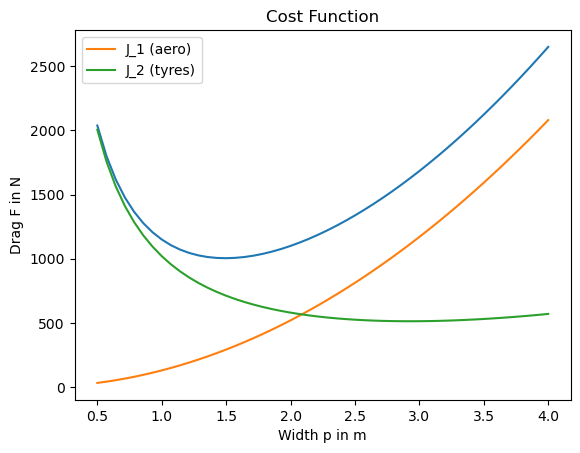

In [12]:
ps = np.linspace(0.5,4)
plt.plot(ps,J(ps))
plt.plot(ps,J_1(ps), label="J_1 (aero)")
plt.plot(ps,J_2(ps), label="J_2 (tyres)")
plt.xlabel("Width p in m")
plt.ylabel("Drag F in N")
plt.title("Cost Function")
plt.legend(); plt.show()

The cost function is 

* convex (consistently curved upwards), and
* smooth (it has a continuous derivative)

 This makes it a nice cost function. 

## Use Derivatives

One way to solve this is to find the derivates of the cost function for further analysis.

### Find Derivatives

This is the cost function in symbolic form ($p$ was defined as a symbol):

In [13]:
p=sym.Symbol("p")
Jp=J(p)
Jp

150*p**2 + 1000/p

The function diff can find the first derivative:

In [14]:
Jpd=sym.diff(Jp,p)
Jpd

300*p - 1000/p**2

We can turn this derivative back into a Python function:

In [15]:
Jd = sym.utilities.lambdify(p,Jpd)

Jd(1.5)

5.555555555555543

Applying diff again finds the second derivative:

In [16]:
Jpdd=sym.diff(Jpd,p)
Jpdd

300 + 2000/p**3

### Plot Derivative

We can plot the derivative:

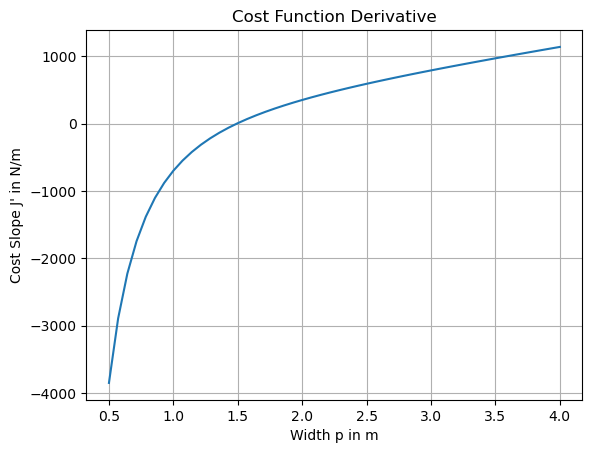

In [17]:
plt.plot(ps,Jd(ps))
plt.xlabel("Width p in m")
plt.ylabel("Cost Slope J' in N/m")
plt.title("Cost Function Derivative")
plt.grid(); plt.show()

The optimum is very clearly visible here, and can be read with much better precision than in the previous plot. 

### Solve Derivative

Wwe can solve the Kuhn-Tucker condition $$J'(p^*)=0$$ without any iteration to find a candidate solution:

In [18]:
sym.solve(Jpd,p)

[10**(1/3)*3**(2/3)/3,
 -10**(1/3)*3**(2/3)/6 - 10**(1/3)*3**(1/6)*I/2,
 -10**(1/3)*3**(2/3)/6 + 10**(1/3)*3**(1/6)*I/2]

Unsurprisingly, the equation has 3 solutions (being a third order equation). Luckily two of these are clearly not of interesting, leaving one solution:

$$ p^* = \sqrt[3]{10/3} \approx 1.494 $$

We could also use a numerical solver at this point. 

## Solve Optimisation

Or we can use a minimisation alogrithm to find the exact minimum, without using the derivative.

The problem is

$$ p^* = \min_p J(p) $$

possibly subject to constraints. 

This easily translates into a Python call. 

In [19]:
pstar = sciopt.minimize(J,5)
pstar

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1004.1494251232543
        x: [ 1.494e+00]
      nit: 7
      jac: [ 0.000e+00]
 hess_inv: [[ 1.111e-03]]
     nfev: 18
     njev: 9

In [20]:
pstar.x

array([1.49380159])

In [21]:
J(pstar.x)

array([1004.14942512])

## Review the Result

The cost function may be skewed towards long vehicles, because it only consideres efficiency, not practicability.

It is a very nice cost function and a simple problem.

| Criteria  | Value | Judgement |
| Scale     | Single Variable | trivial |
| Cost      | Single Objective | easy |
| Convexity | Convex | easy |
| Smoothness | Infinitely Smooth | easy |
| Constraints | None | easy |
| Limits    | None?  | easy |

## Complete an Exercise

### Review

In [26]:
def J(p):
    return 150*p**2+1000/p

pstar = sciopt.minimize(J,5)

pstar

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1004.1494251232543
        x: [ 1.494e+00]
      nit: 7
      jac: [ 7.629e-06]
 hess_inv: [[ 1.112e-03]]
     nfev: 20
     njev: 10

### Exercise

Consider the function 

$$ J(p) = (p-2)^2

Implement it in Python and solve it for $p^*$. You can use the space below.

How difficult is this problem compared to the problem before?

In [28]:
def J(p):
    return "add your own expression here"

pstar = "add your own procedure here"

pstar

'add your own procedure here'

## Introduce Homework 

1. Solve the exercise problem using algebra. 
2. Use this notebook and test different values for $V$. How does this affect the result?
3. Can you find an algebraic expression for $p^*$ as a function of $V$? 

## Conclude the Session

Optimisation requires several steps:

1. Formulate the cost function $J$
2. Define constraints and select $p$
3. Formulate the optimisation problem $J(p)$
4. Solve it for $p^*$ through algebraic or numerical means
5. Validate the result $J^* = J(p^*)$

Tools that we use:

* Possibly a modelling / simulation tool
* a dynamic interpreted language (MATLAB or Python)
* a symbolic solver can be useful for simple problems

We will look at more difficult problems next. 